# Package Imports

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(font_scale=1.2, context="paper", style="ticks")
sns.set_palette("viridis")

import mysql.connector as mariadb
from astropy.time import Time

%matplotlib inline

import plotly
plotly.offline.init_notebook_mode(connected=True)

import sys
sys.path.append("../..")

In [2]:
os.environ.get("CONDA_PREFIX")

'/epyc/opt/anaconda'

In [3]:
os.nice(1)

1

In [4]:
import thor

## Run THOR

In [5]:
columnMapping = {        
        
        # Observation ID
        "obs_id" : "obs_id",
        
        # Exposure time
        "exp_mjd" : "exp_mjd",
        
        # Visit ID
        "visit_id" : "visit_id",
        
        # Field ID
        "field_id" : "field",
        
        # Field RA in degrees
        "field_RA_deg" : "fieldRA_deg",
        
        # Field Dec in degrees
        "field_Dec_deg" : "fieldDec_deg",
        
        # Night number
        "night": "nid",
        
        # RA in degrees
        "RA_deg" : "ra",
        
        # Dec in degrees
        "Dec_deg" : "decl",
        
        # Observer's x coordinate in AU
        "obs_x_au" : "HEclObsy_X_au",
        
        # Observer's y coordinate in AU
        "obs_y_au" : "HEclObsy_Y_au",
        
        # Observer's z coordinate in AU
        "obs_z_au" : "HEclObsy_Z_au",
        
        # Magnitude (UNUSED)
        "mag" : "magpsf",
        
        ### Truth Parameters
        
        # Object name
        "name" : "designation",
        
        # Observer-object distance in AU
        "Delta_au" : "Delta_au",
        
        # Sun-object distance in AU (heliocentric distance)
        "r_au" : "r_au",
        
        # Object's x coordinate in AU
        "obj_x_au" : "HEclObj_X_au",
        
        # Object's y coordinate in AU
        "obj_y_au" : "HEclObj_Y_au",
        
        # Object's z coordinate in AU
        "obj_z_au" : "HEclObj_Z_au",
        
        # Object's x velocity in AU per day
        "obj_dx/dt_au_p_day" : "HEclObj_dX/dt_au_p_day",
        
        # Object's y velocity in AU per day
        "obj_dy/dt_au_p_day" : "HEclObj_dY/dt_au_p_day",
        
        # Object's z velocity in AU per day
        "obj_dz/dt_au_p_day" : "HEclObj_dZ/dt_au_p_day",
        
        # Semi-major axis
        "a_au" : "a_au",
        
        # Inclination
        "i_deg" : "i_deg",
        
        # Eccentricity
        "e" : "e",
    }

In [6]:
simulated_ephemeris = pd.read_csv("../analysis/ztf/known_object_observations_nid_610_624.eph", sep=" ", index_col=False, low_memory=False)
orbits = pd.read_csv("../analysis/ztf/known_object_observations_nid_610_624.orb", sep=" ", index_col=False, low_memory=False)

#observations = pd.read_csv("../analysis/ztf/known_object_observations_nid_610_624.txt", sep=" ", index_col=False, low_memory=False)
observations = pd.read_csv("../analysis/ztf/observations_nid_610_624.txt", sep=" ", index_col=False, low_memory=False)

observations.sort_values(by="mjd", inplace=True)
#observations.drop(index=observations[observations["designation"].isna()].index, inplace=True)
observations.loc[observations["designation"].isna(), "designation"] = -1

In [7]:
allObjects_survey, summary_survey = thor.analyzeObservations(observations, columnMapping=columnMapping, minSamples=5, unknownIDs=[-1])

THOR: analyzeObservations
-------------------------
Analyzing observations...
Known object observations: 252836
Unknown object observations: 574710
False positive observations: 0
Percent known object observations (%): 30.553
Percent unknown object observations (%): 69.447
Percent false positive observations (%): 0.000
Unique known objects: 62307
Unique known objects with at least 5 detections: 21401

Total time in seconds: 0.5246100425720215
-------------------------



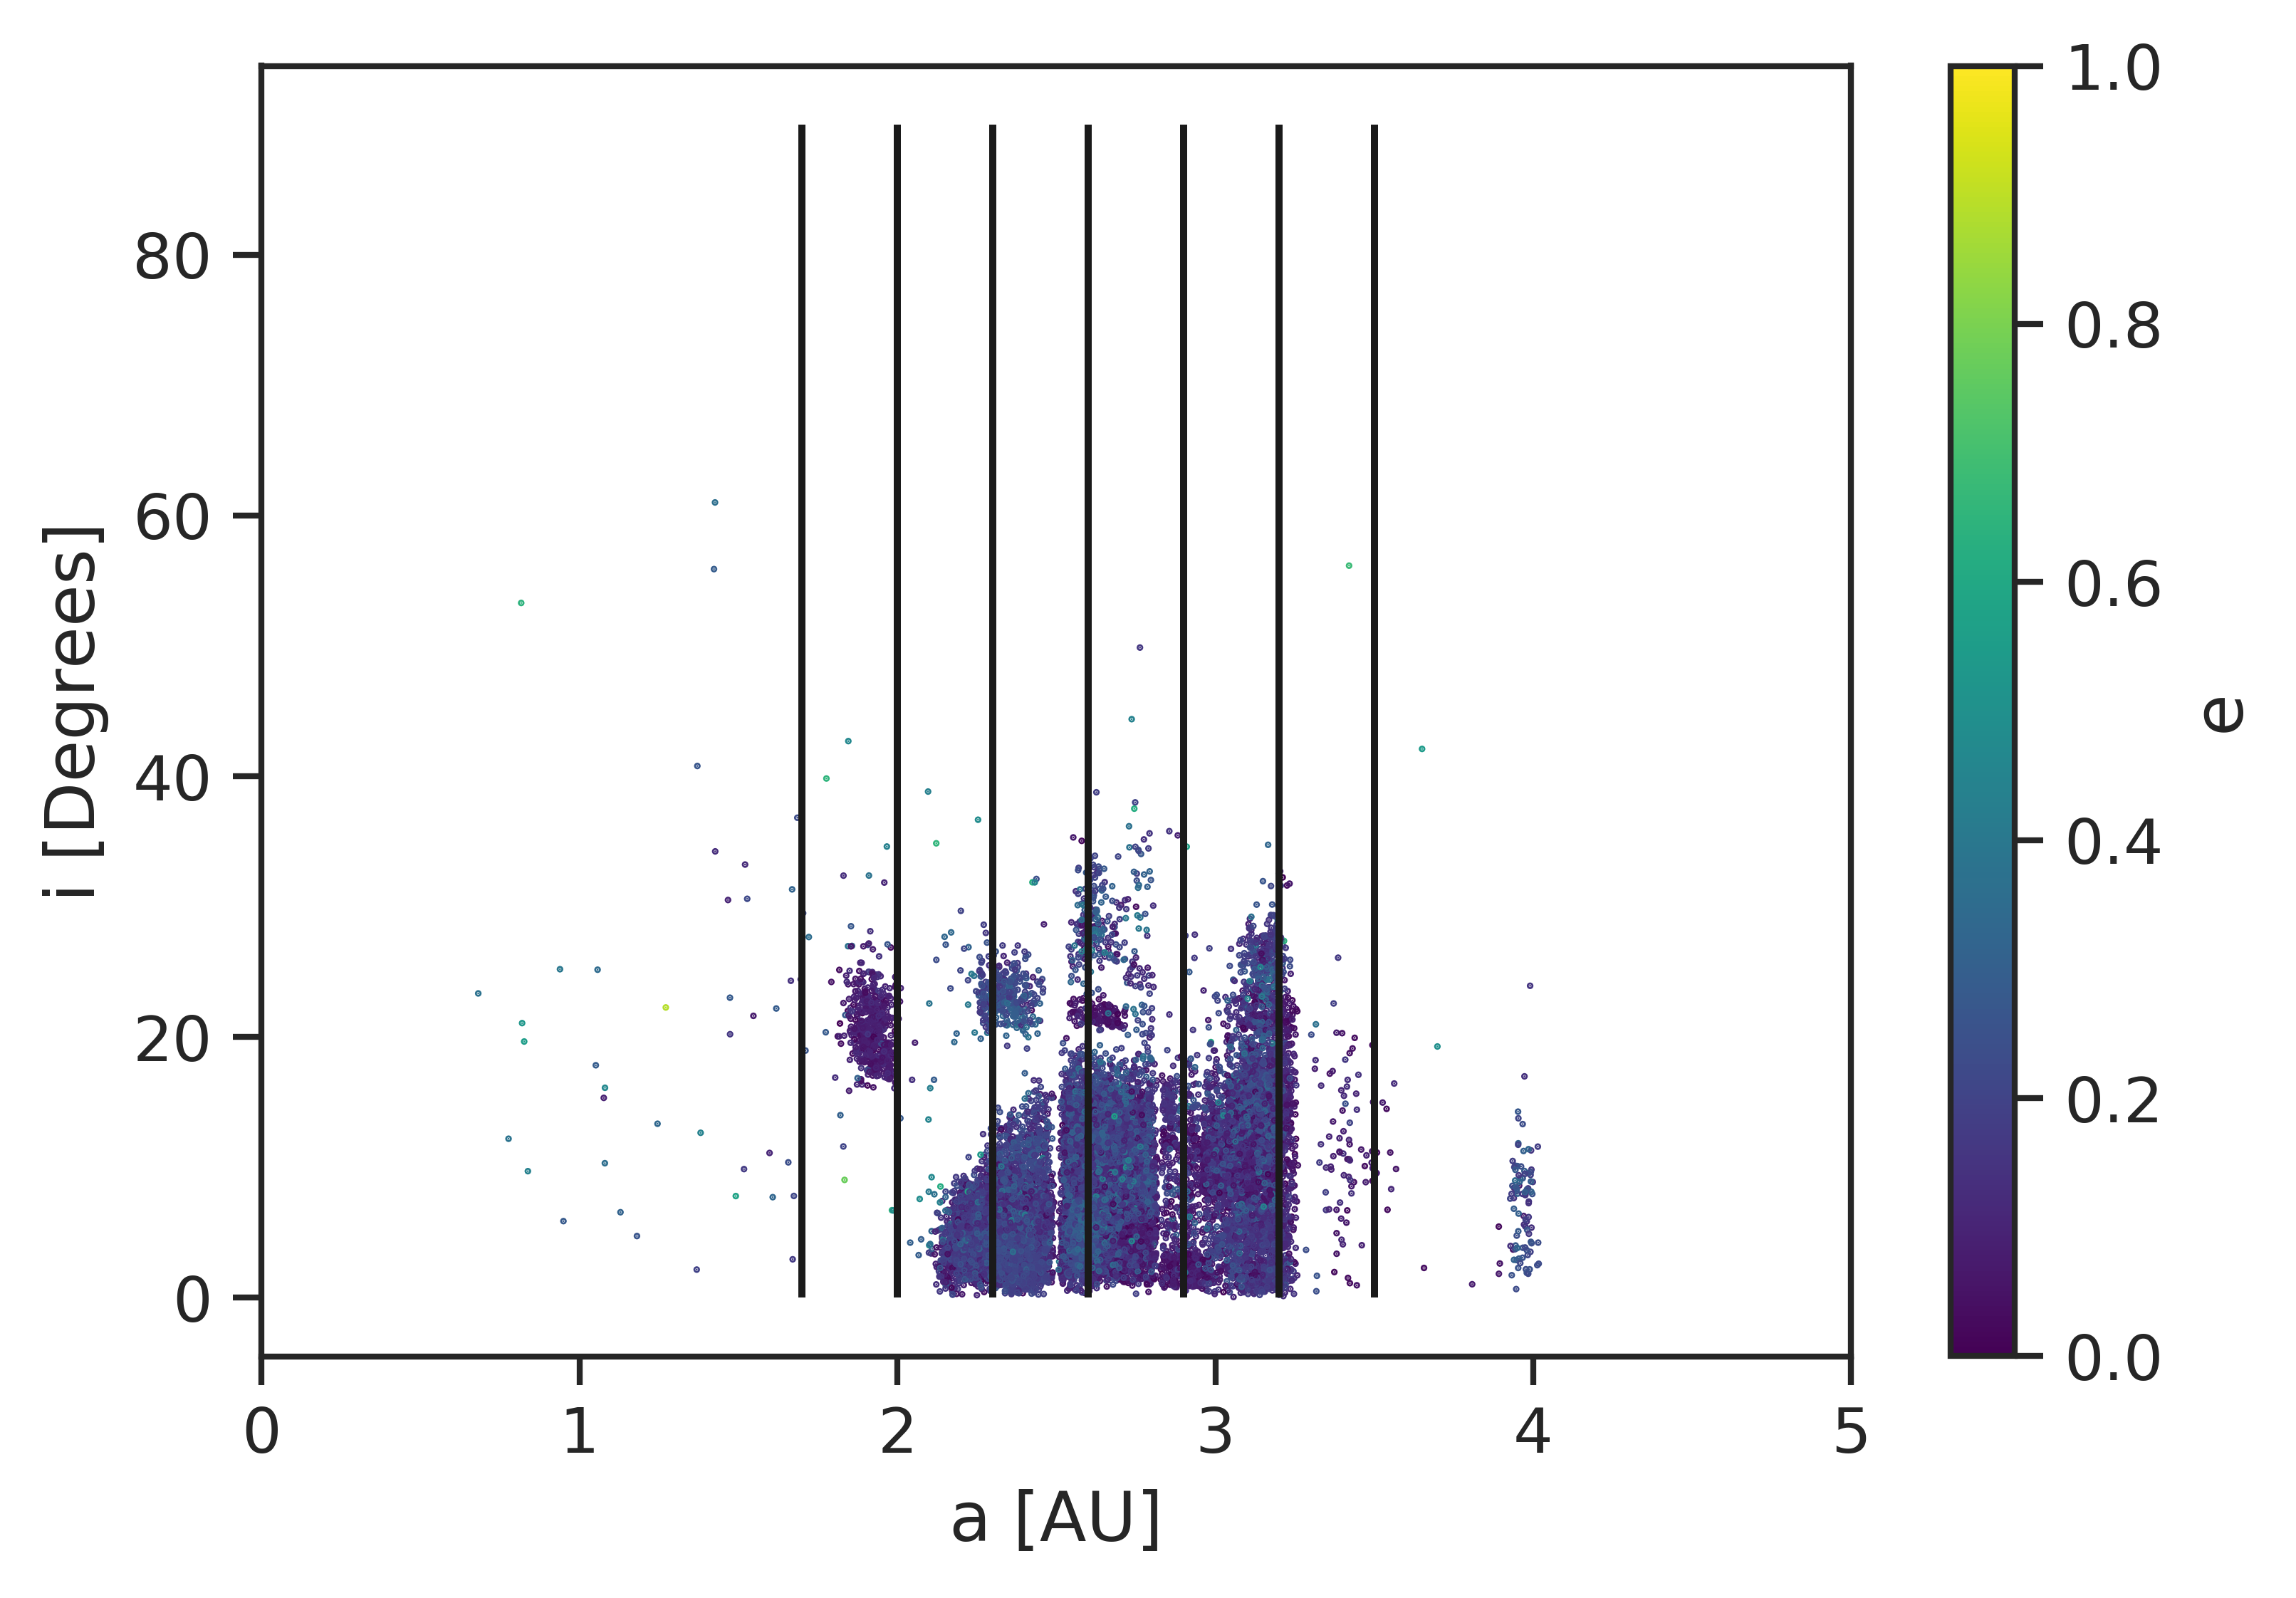

In [9]:
fig, ax = thor.plotOrbitsFindable(allObjects_survey, orbits)
ax.set_xlim(0, 5)
#ax.vlines([0.0, 2.0, 2.2, 2.5, 3.0, 4.0, 10], 0, 90)
ax.vlines([1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 10], 0, 90)

In [10]:
simulated_ephemeris["exp_mjd"] = simulated_ephemeris["mjd_utc"]

In [11]:
objs = observations[observations["nid"].isin([610, 611, 612, 613, 614, 615, 616, 617])]["designation"].unique()
objs_findable = allObjects_survey[(allObjects_survey["findable"] == 1) & (allObjects_survey["designation"].isin(objs))]["designation"].values

In [12]:
size = 15
ras = np.arange(0, 360 + size, size)
decs = np.arange(-90, 90 + size, size)

In [13]:
average_orbits_list = []

for ra_i, ra_f in zip(ras[:-1], ras[1:]):
    for dec_i, dec_f in zip(decs[:-1], decs[1:]):
        average_orbits_list.append(thor.findAverageOrbits(simulated_ephemeris[(simulated_ephemeris["designation"].isin(objs_findable))
                                                                              & (simulated_ephemeris["RA_deg"] >= ra_i) 
                                                                              & (simulated_ephemeris["RA_deg"] < ra_f)
                                                                              & (simulated_ephemeris["Dec_deg"] < dec_f)
                                                                              & (simulated_ephemeris["Dec_deg"] >= dec_i)],
                                                orbits[orbits["designation"].isin(objs_findable)], 
                                                elementType="keplerian", 
                                                dValues=[1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 10]))
                                                #columnMapping=columnMapping)
average_orbits = pd.concat(average_orbits_list)

THOR: findAverageObject
-------------------------
Finding average orbit in 7 distance bins...
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
Done.
-------------------------

THOR: findAverageObject
-------------------------
Finding average orbit in 7 distance bins...
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
Done.
-------------------------

THOR: findAverageObject
-------------------------
Finding average orbit in 7 distance bins...
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
No real objects found.
Done.
-------------------------

THOR: findAverageObject
-------------------------
Finding average orbit in 7 distance bins...
No real objects found.
No real objects fou

In [14]:
average_orbits.sort_values(by=["r_au"], inplace=True)
average_orbits["orbit_id"] = np.arange(1, len(average_orbits) + 1)
average_orbits.reset_index(inplace=True, drop=True)

In [15]:
orbits["i_rad"] = np.radians(orbits["i_deg"])
orbits["ascNode_rad"] = np.radians(orbits["ascNode_deg"])
orbits["argPeri_rad"] = np.radians(orbits["argPeri_deg"])
orbits["meanAnom_rad"] = np.radians(orbits["meanAnom_deg"])

In [16]:
average_orbits = average_orbits.drop(index=average_orbits[average_orbits["designation"].isna()].index)

In [17]:
for orbit_id in average_orbits["orbit_id"].values:
    orbit = average_orbits[average_orbits["orbit_id"] == orbit_id]
    
    observations_orbit = observations[observations["designation"] == orbit["designation"].values[0]]
    new_epoch = observations_orbit["exp_mjd"].min()
    
    orbit_from_cat = orbits[orbits["designation"] == orbit["designation"].values[0]]
    current_epoch = orbit_from_cat["epoch_TT_mjd"]
    
    eph = thor.propagateTestParticle(orbit_from_cat[["a_au", "e", "i_rad", "ascNode_rad", "argPeri_rad", "meanAnom_rad"]].values[0], current_epoch, [new_epoch], observatoryCode="I41", mjdScale="TT", elementType="keplerian")
    
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "r_au"] = eph["r_au"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "RA_deg"] = eph["RA_deg"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "Dec_deg"] = eph["Dec_deg"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "exp_mjd"] = eph["mjd"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "HEclObj_dX/dt_au_p_day"] = eph["HEclObj_dX/dt_au_p_day"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "HEclObj_dY/dt_au_p_day"] = eph["HEclObj_dY/dt_au_p_day"].values[0]
    average_orbits.loc[average_orbits["orbit_id"] == orbit_id, "HEclObj_dZ/dt_au_p_day"] = eph["HEclObj_dZ/dt_au_p_day"].values[0]

In [18]:
average_orbits_in_observations = observations[observations["designation"].isin(average_orbits["designation"].values)].copy()
average_orbits_in_observations.drop_duplicates(subset=["designation"], keep="first", inplace=True)

In [19]:
average_orbits_in_observations.head()

,ra,decl,field,nid,jd,exp_mjd,magpsf,sigmapsf,fid,ssnamenr,fieldRA_deg,fieldDec_deg,visit_id,mjd,HEclObsy_X_au,HEclObsy_Y_au,HEclObsy_Z_au,obs_id,designation,splitname
390119,265.790100,15.923739,587,610,2.458365e+06,58364.132882,18.5629,0.109997,2,107797,267.11592,18.95,1283,58364.132882,0.949965,-0.339551,0.000049,390120,A7797,107797
390118,268.818870,18.556712,587,610,2.458365e+06,58364.132882,16.0371,0.028977,2,6249,267.11592,18.95,1283,58364.132882,0.949965,-0.339551,0.000049,390119,06249,6249
499817,279.699048,30.275452,684,610,2.458365e+06,58364.146458,20.0807,0.199373,2,2014RY12,282.56279,33.35,2717,58364.146458,0.950042,-0.339332,0.000048,499818,K14R12Y,2014RY12
394455,288.818438,17.956876,590,610,2.458365e+06,58364.147049,19.4557,0.121023,2,81583,288.92157,18.95,1379,58364.147049,0.950046,-0.339323,0.000048,394456,81583,81583
497193,248.524473,30.052451,680,610,2.458365e+06,58364.158495,20.3001,0.187441,2,514652,251.14964,33.35,2363,58364.158495,0.950111,-0.339137,0.000048,497194,p4652,514652


In [20]:
average_orbits = average_orbits.rename(columns={"RA_deg": columnMapping["RA_deg"], "Dec_deg": columnMapping["Dec_deg"]})

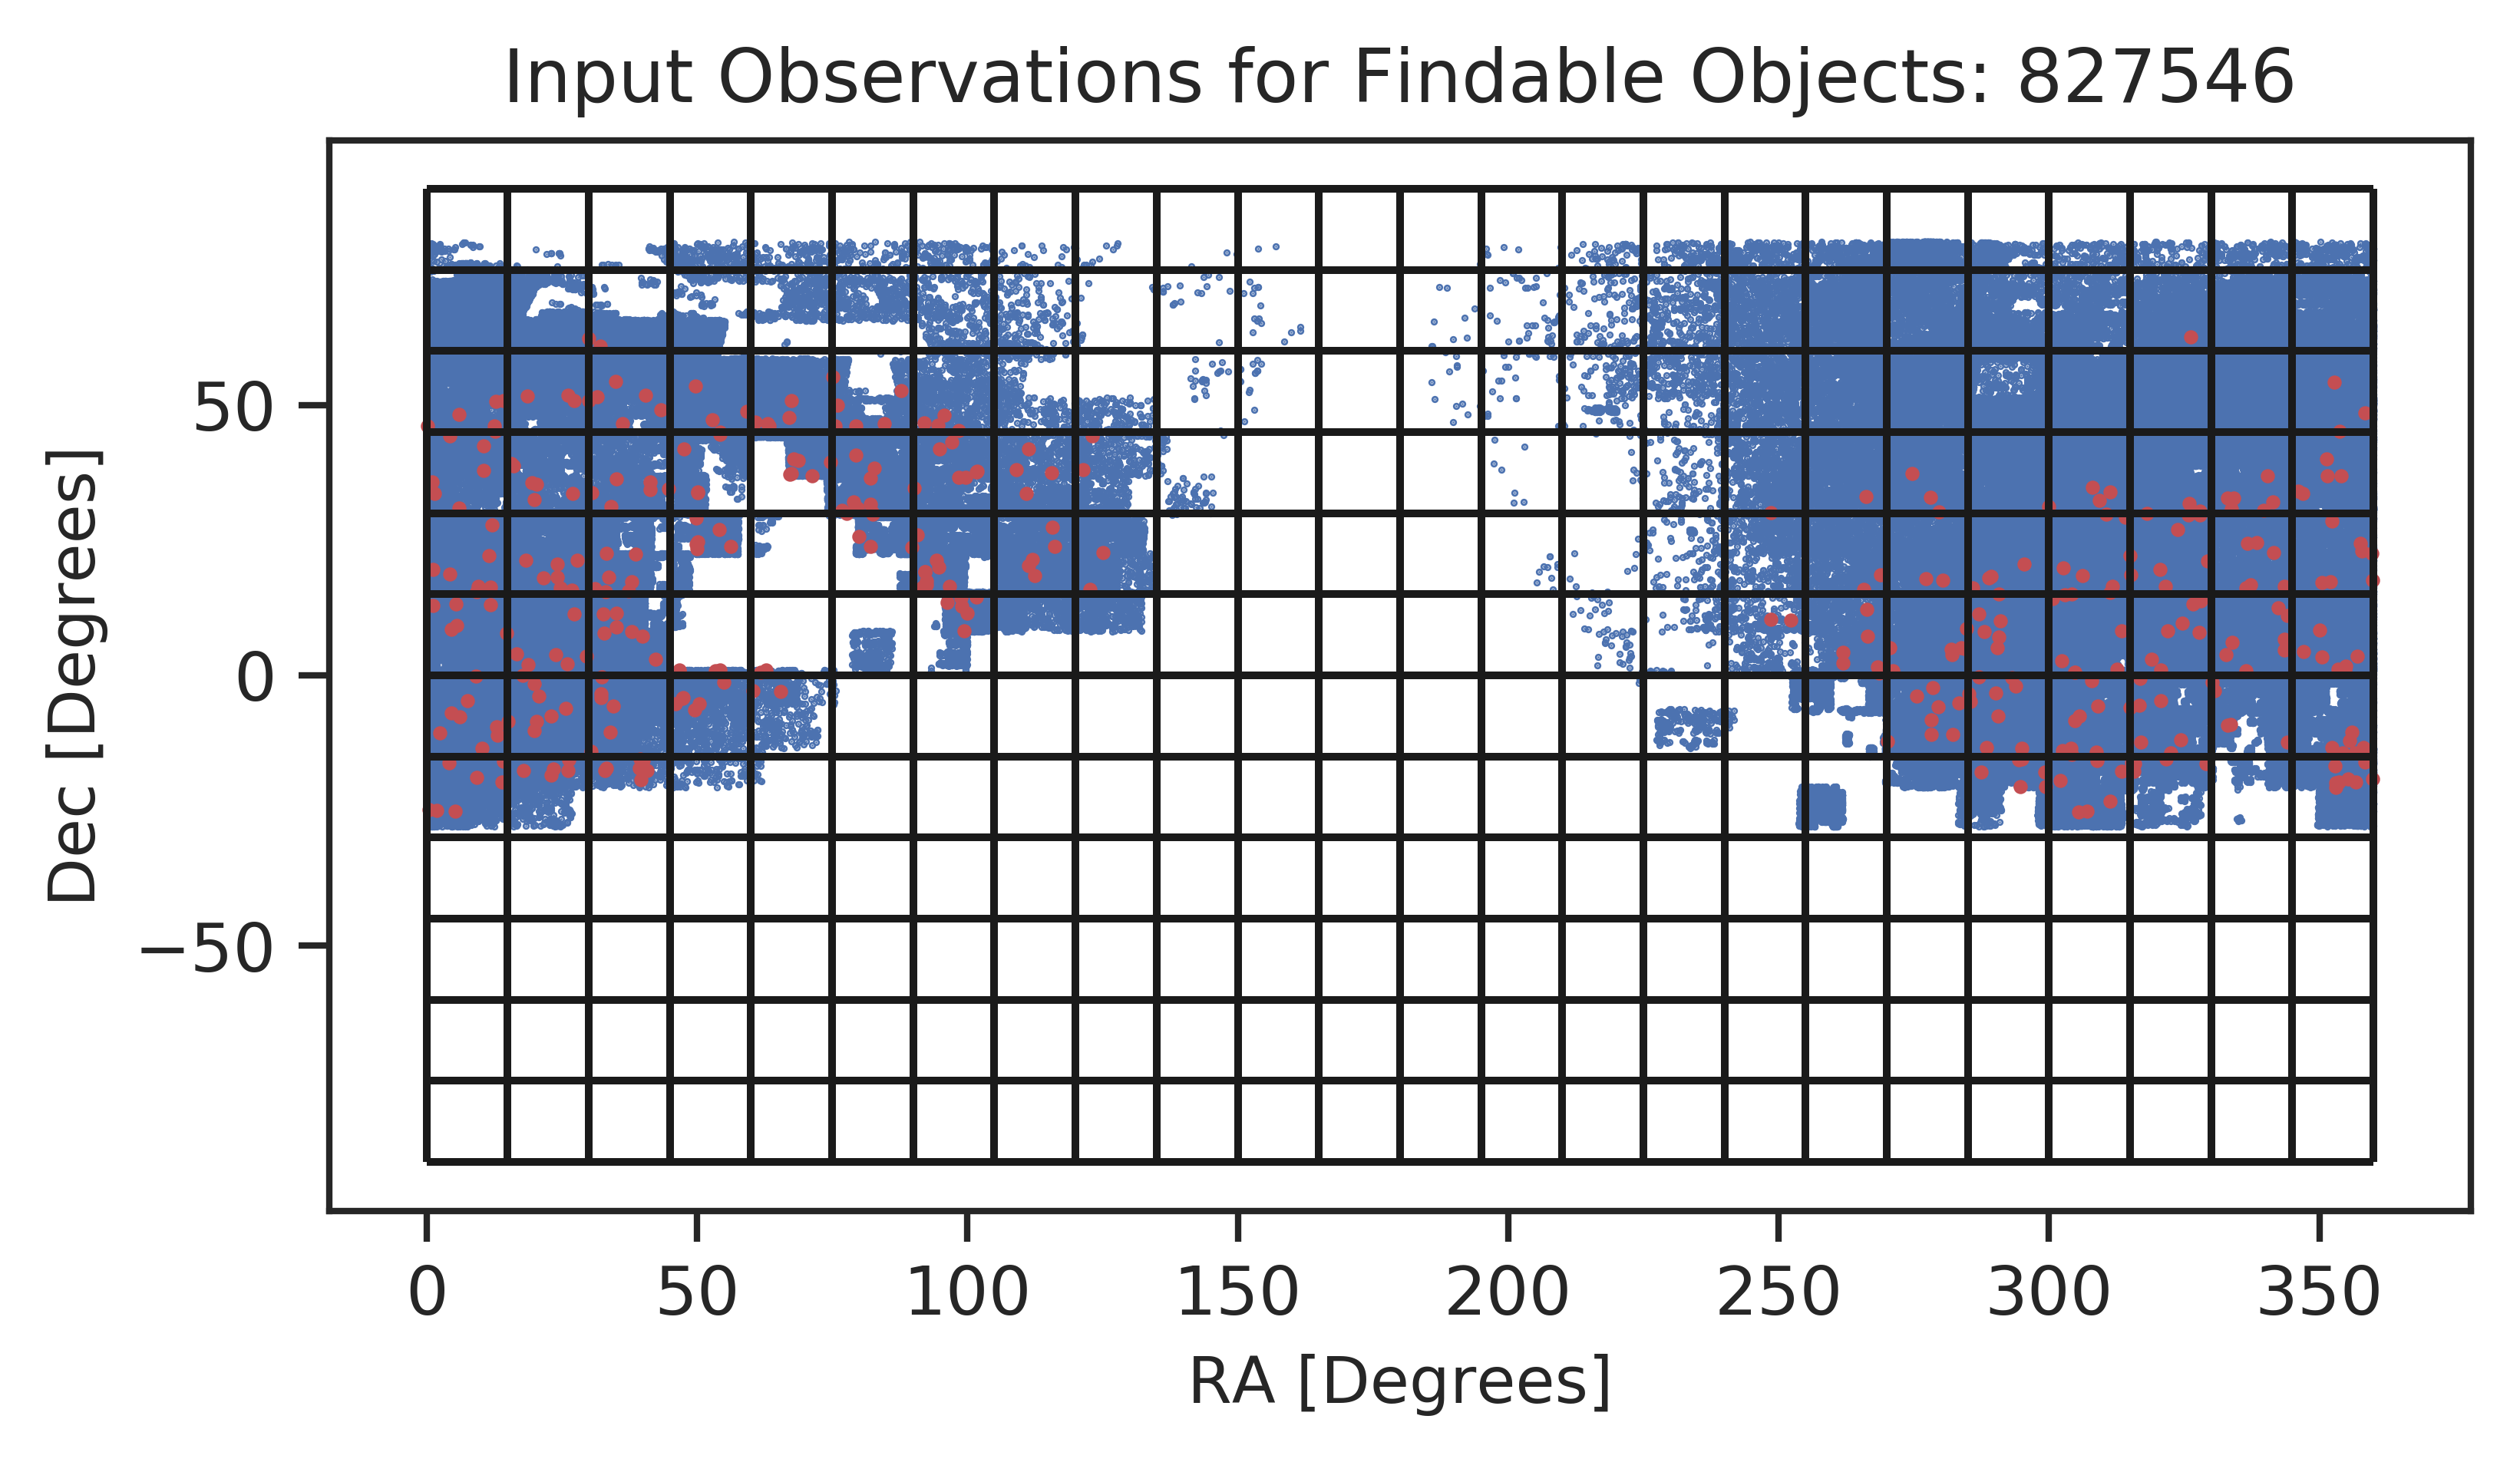

In [21]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Input Observations for Findable Objects: {}".format(len(observations)))
ax.vlines(ras, -90, 90)
ax.hlines(decs, 0, 360)
#fig.savefig("../analysis/ztf/199orbits_input_observations.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[observations["designation"].isin(objs_findable)][[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Input Observations for Findable Objects: {}".format(len(observations)))
#fig.savefig("../analysis/ztf/199orbits_input_observations.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Input Observations: {}".format(len(observations)))
#fig.savefig("../analysis/ztf/199orbits_input_observations.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[observations["obs_id"].isin(linked_detections)][[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Linked Observations: {}".format(len(observations[observations["obs_id"].isin(linked_detections)])))
#fig.savefig("../analysis/ztf/199orbits_linked_observations.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[~observations["obs_id"].isin(linked_detections)][[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Unlinked Observations: {}".format(len(observations[~observations["obs_id"].isin(linked_detections)])))
#fig.savefig("../analysis/ztf/199orbits_unlinked_observations.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[observations["designation"].isin(linked_objects)][[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Linked Object Observations (Assuming Attribution): {}".format(len(observations[observations["designation"].isin(linked_objects)])))
#fig.savefig("../analysis/ztf/199orbits_linked_objects.png")

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=600)
ax.scatter(*observations[observations["designation"].isin(missed_objects)][[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values.T,
           s=0.1,
           c="b")
ax.scatter(average_orbits[columnMapping["RA_deg"]].values, average_orbits[columnMapping["Dec_deg"]].values, c="r", s=2)
ax.set_aspect("equal")
ax.set_xlabel("RA [Degrees]", size=10)
ax.set_ylabel("Dec [Degrees]", size=10)
ax.set_title("Missed Object Observations [No Noise]: {}".format(len(observations[observations["designation"].isin(missed_objects)])))
#fig.savefig("../analysis/ztf/199orbits_missed_objects.png")

In [23]:
! rm -rf ../analysis/ztf/run_12/

In [24]:
observations = pd.merge(observations, simulated_ephemeris[["designation", "r_au"]], 
                        left_on="designation", 
                        right_on="designation", 
                        how="left",
                        suffixes=('', '_y'))

In [ ]:
allObjects_survey, summary_survey, summary_orbits = thor.runTHOR(observations, 
                                                                average_orbits, 
                                                                knownOrbits=orbits,
                                                                runDir="../analysis/ztf/run_12/", 
                                                                cellArea=500,
                                                                cellShape="circle",
                                                                threads=40,
                                                                vxBins=300,
                                                                vyBins=300,
                                                                eps=0.005,
                                                                minSamples=5,
                                                                unknownIDs=[-1],
                                                                columnMapping=columnMapping)

THOR: runTHOR
-------------------------
Running THOR with 395 orbits...

THOR: analyzeObservations
-------------------------
Analyzing observations...
Known object observations: 252836
Unknown object observations: 574710
False positive observations: 0
Percent known object observations (%): 30.553
Percent unknown object observations (%): 69.447
Percent false positive observations (%): 0.000
Unique known objects: 62307
Unique known objects with at least 5 detections: 21401

Total time in seconds: 1.928464651107788
-------------------------

THOR: runTHOR
-------------------------
Running orbit 1...

THOR: analyzeProjections
-------------------------
Analyzing projections...
Known object observations: 120
Unknown object observations: 3664
False positive observations: 0
Percent known object observations (%): 3.171
Percent unknown object observations (%): 96.829
Percent false positive observations (%): 0.000
Unique known objects: 8
Unique known objects with at least 5 detections: 5

Total t

../thor/analysis.py:572: RuntimeWarning:

divide by zero encountered in true_divide

../thor/analysis.py:573: RuntimeWarning:

divide by zero encountered in true_divide

../thor/analysis.py:574: RuntimeWarning:

divide by zero encountered in true_divide

/epyc/projects/thor/envs/thor/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning:

invalid value encountered in subtract

../thor/analysis.py:575: RuntimeWarning:

divide by zero encountered in true_divide



Known object observations: 7366
Unknown object observations: 2530
False positive observations: 0
Percent known object observations (%): 74.434
Percent unknown object observations (%): 25.566
Percent false positive observations (%): 0.000
Unique known objects: 2279
Unique known objects with at least 5 detections: 588

Total time in seconds: 11.23254656791687
-------------------------

THOR: clusterAndLink
-------------------------
Running velocity space clustering...
X velocity range: [-0.1, 0.1]
X velocity bins: 300
Y velocity range: [-0.1, 0.1]
Y velocity bins: 300
User defined x velocity values: False
User defined y velocity values: False
Velocity grid size: 90000
Max sample distance: 0.005
Minimum samples: 5
Using 40 threads...
Done. Completed in 168.3368740081787 seconds.

Restructuring clusters...
Done. Completed in 0.3945181369781494 seconds.

Found 9809 clusters.
Total time in seconds: 168.73174834251404
-------------------------

THOR: analyzeClusters
-------------------------


In [ ]:
projected_obs = pd.read_csv("../analysis/ztf/run_3/orbit_0001/projected_obs.txt", sep=" ", index_col=False)

In [ ]:
observations[observations["obs_id"].isin(projected_obs["obs_id"].values)]

In [ ]:
from thor import TestParticle

In [ ]:
o = average_orbits[average_orbits["orbit_id"] == 1]

In [ ]:
o

In [ ]:
x_e = projected_obs[['HEclObsy_X_au', 'HEclObsy_Y_au', 'HEclObsy_Z_au']].values[0]

In [ ]:
particle = TestParticle(o[["ra", "decl"]].values[0], 
                        o["r_au"].values[0],
                        o[["HEclObj_dX/dt_au_p_day",
                           "HEclObj_dY/dt_au_p_day",
                           "HEclObj_dZ/dt_au_p_day"]].values[0],
                           x_e, 
                           o["exp_mjd"].values[0])

In [ ]:
particle.prepare()

In [ ]:
from thor import Cell

In [ ]:
cell = Cell(o[["ra", "decl"]].values[0], o["exp_mjd"].values[0], projected_obs, shape="circle", area=500)

In [ ]:
cell.getObservations(columnMapping=columnMapping)

In [ ]:
cell.observations


In [ ]:
particle.apply(cell, columnMapping=columnMapping)

In [ ]:
verbose = True
from thor.vectors import *
from thor.coordinates import *
from thor.projections import *
self = particle

if verbose is True:
    print("Applying rotation matrices to observations...")
    print("Convering to ecliptic coordinates...")
coords_ec = equatorialToEclipticAngular(np.radians(cell.observations[[columnMapping["RA_deg"], columnMapping["Dec_deg"]]].values))

if verbose is True:
    print("Calculating object to observer unit vector...")
n_ae = calcNae(coords_ec)
x_e = cell.observations[[columnMapping["obs_x_au"], columnMapping["obs_y_au"], columnMapping["obs_z_au"]]].values

if verbose is True:
    print("Calculating object to observer distance assuming r = {} AU...".format(self.r))
delta = np.zeros(len(n_ae))
for i, (n_ae_i, x_e_i) in enumerate(zip(n_ae, x_e)):
    delta[i] = calcDelta(self.r, x_e_i, n_ae_i)

if verbose is True:
    print("Calculating object to observer position vector...")
x_ae = np.zeros([len(delta), 3])
for i, (delta_i, n_ae_i) in enumerate(zip(delta, n_ae)):
    x_ae[i] = calcXae(delta_i, n_ae_i)

if verbose is True:
    print("Calculating barycentic object position vector...")
x_a = np.zeros([len(x_ae), 3])
for i, (x_ae_i, x_e_i) in enumerate(zip(x_ae, x_e)):
    x_a[i] = calcXa(x_ae_i, x_e_i)

if verbose is True:
    print("Applying rotation matrix M to barycentric object position vector...")
coords_cart_rotated = np.array(self.M @ x_a.T).T

if verbose is True:
    print("Performing gnomonic projection...")
gnomonic = cartesianToGnomonic(coords_cart_rotated)

cell.observations["theta_x_deg"] = np.degrees(gnomonic[:, 0])
cell.observations["theta_y_deg"] = np.degrees(gnomonic[:, 1])

if verbose is True:
    print("Done.")
    print("") 

In [ ]:
x_e

In [ ]:
delta = np.zeros(len(n_ae))
for i, (n_ae_i, x_e_i) in enumerate(zip(n_ae, x_e)):
    print(n_ae_i, x_e_i)
    print(calcDelta(self.r, x_e_i, n_ae_i))
    delta[i] = calcDelta(self.r, x_e_i, n_ae_i)

In [ ]:
from numpy.linalg import norm

In [ ]:
-np.dot(n_ae_i, x_e_i) #+ np.sqrt(norm(np.dot(n_ae_i, x_e_i))** 2 + self.r**2 - norm(x_e_i)**2)

In [ ]:
n_ae_i

In [ ]:
n_ae

In [ ]:
observations[observations["designation"].isin(["f3563"])]

In [ ]:
summary_orbits = pd.read_csv("../analysis/ztf/run_3/summary_orbits.txt", sep=" ", index_col=False)
summary_orbits = summary_orbits.merge(average_orbits)

In [ ]:
summary_orbits

In [ ]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.scatter(summary_orbits["r_au"].values, 
           summary_orbits["percent_completeness"].values, 
           s=1)
          #c=summary_orbits["r_au"].values)
#ax.scatter(summary_orbits["r_au"].values, summary_orbits["num_unique_known_objects_missed"].values, s=1)


In [ ]:
linked_detections = np.loadtxt("../analysis/ztf/run_3/linked_detections.txt", dtype=int)

In [ ]:
fig, ax = plt

In [ ]:
np.dot(n_ae_i, x_e_i)** 2

In [ ]:
norm(x_e_i)**2

In [ ]:
np.sqrt(norm(np.dot(n_ae_i, x_e_i)))

In [ ]:
np.dot(n_ae_i, x_e_i)

In [ ]:
cell.observations

In [ ]:
n_ae 

In [ ]:
allObjects_noise = pd.read_csv("../analysis/ztf/run_10/allObjects_survey.txt", index_col=False, sep=" ")
allObjects_no_noise = pd.read_csv("../analysis/ztf/run_7/allObjects_survey.txt", index_col=False, sep=" ")
summary_noise = pd.read_csv("../analysis/ztf/run_10/summary_survey.txt", index_col=False, sep=" ")
summary_no_noise = pd.read_csv("../analysis/ztf/run_7/summary_survey.txt", index_col=False, sep=" ")

In [ ]:
found_no_noise = allObjects_no_noise[allObjects_no_noise["found"] == 1]["designation"].unique()
found_noise = allObjects_noise[allObjects_noise["found"] == 1]["designation"].unique()

In [ ]:
len(found_no_noise)

In [ ]:
len(found_noise)

In [ ]:
set(found_no_noise).difference(set(found_noise))

In [ ]:
set(found_noise).difference(set(found_no_noise))

In [ ]:
set(found_noise).difference

In [ ]:
summary_no_noise

In [ ]:
summary_noise